In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
from mpl_toolkits.mplot3d import Axes3D
import itertools
from matplotlib import cm
from scipy.sparse import linalg

In [2]:
A1 = np.matrix([[1000, 0.01], [0.01, 1000]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

In [3]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

In [4]:
# A1 Condition Number
cndA1 = np.linalg.cond(A1)
print('Condition Number A1 : {0}'.format(cndA1) );

Condition Number A1 : 1.0000200002000017


In [5]:
def plot_surface(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-100, 100, size))
    x2 = list(np.linspace(-100, 100, size))
    # cartesian binary expression
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    plt.show()
    return x1, x2, zs

In [6]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    plt.show()

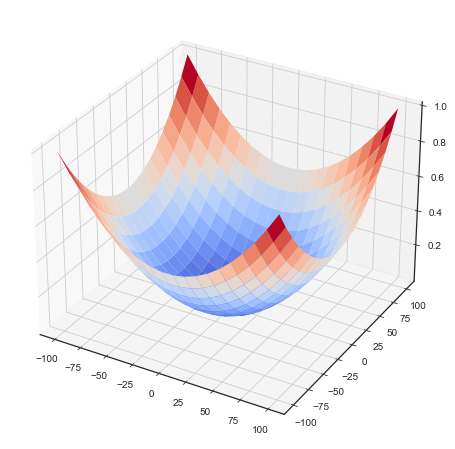

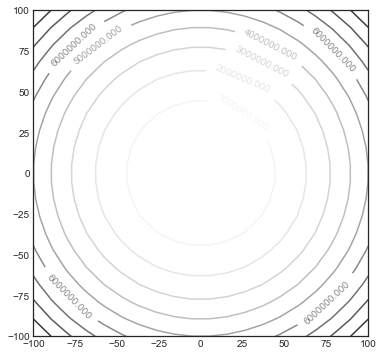

In [7]:
# Plot Surface A1.
x1, x2, zs = plot_surface(A1, b, c)
contoursteps(x1, x2, zs)

In [8]:
# Find minimum by solving Ax=b by taking the inverse of A matrix
invA1 = np.linalg.inv(A1)
x = invA1.dot(b)
print('Minimum Point X Taking Inverse : {0}'.format(x) );

Minimum Point X Taking Inverse : [[ 0.00200008]
 [-0.00800002]]


In [9]:
x0 = np.matrix([[5], [5]])
linalg.cg(A1, b, x0, tol=1e-05, maxiter=2000, M = None, callback=None, atol=None)
print('Minimum Point X By using Conjugate Gradient method : {0}'.format(x) );

Minimum Point X By using Conjugate Gradient method : [[ 0.00200008]
 [-0.00800002]]


In [10]:
x0 = np.matrix([[10], [10]])
linalg.cg(A1, b, x0, 1e-05, 2000, invA1, callback=None, atol=None)
print('Minimum Point X By using Preconditioned Conjugate Gradient method : {0}'.format(x) );

Minimum Point X By using Preconditioned Conjugate Gradient method : [[ 0.00200008]
 [-0.00800002]]


In [11]:
A2 = np.matrix([[101, -99], [-99, 101]])

# A2 Condition Number
cndA2 = np.linalg.cond(A2)
print('Condition Number A2 : {0}'.format(cndA2) );

Condition Number A2 : 100.00000000000104


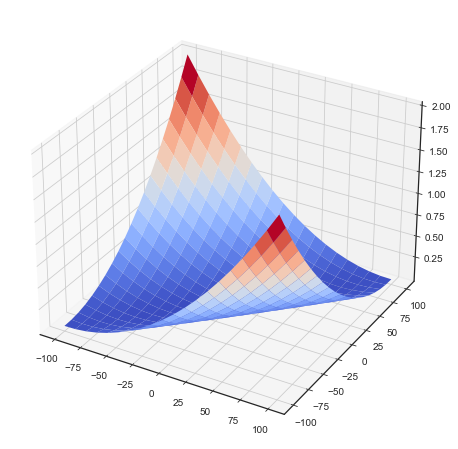

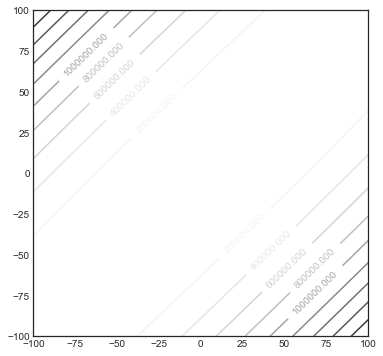

In [12]:
# Plot Surface A2.
x1, x2, zs = plot_surface(A2, b, c)
contoursteps(x1, x2, zs)

In [13]:
# Find minimum by solving Ax=b by taking the inverse of A matrix
invA2 = np.linalg.inv(A2)
x = invA2.dot(b)
print('Minimum Point X Taking Inverse : {0}'.format(x) );

Minimum Point X Taking Inverse : [[-1.475]
 [-1.525]]


In [14]:
x0 = np.matrix([[5], [5]])
linalg.cg(A2, b, x0, tol=1e-05, maxiter=2000, M = None, callback=None, atol=None)
print('Minimum Point X By using Conjugate Gradient method : {0}'.format(x) );

Minimum Point X By using Conjugate Gradient method : [[-1.475]
 [-1.525]]


In [15]:
x0 = np.matrix([[10], [10]])
linalg.cg(A2, b, x0, 1e-05, 2000, invA2, callback=None, atol=None)
print('Minimum Point X By using Preconditioned Conjugate Gradient method : {0}'.format(x) );

Minimum Point X By using Preconditioned Conjugate Gradient method : [[-1.475]
 [-1.525]]


In [16]:
A3 = np.matrix([[10001, -9999], [-9999, 10001]])

# A3 Condition Number
cndA3 = np.linalg.cond(A3)
print('Condition Number A3 : {0}'.format(cndA3) );

Condition Number A3 : 10000.00000000469


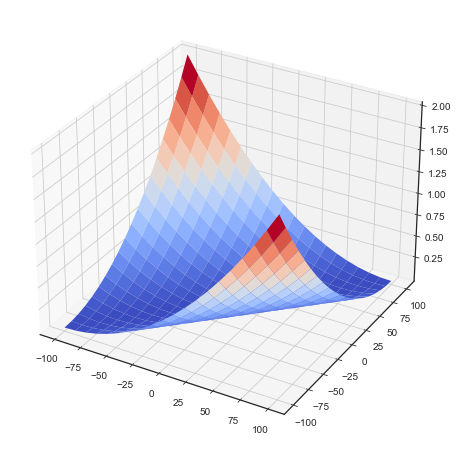

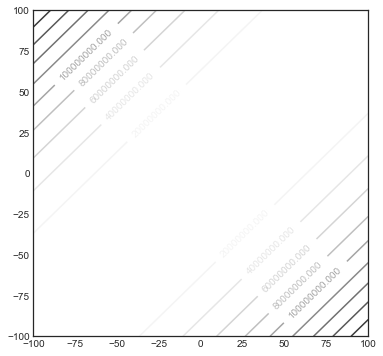

In [17]:
# Plot Surface A3.
x1, x2, zs = plot_surface(A3, b, c)
contoursteps(x1, x2, zs)

In [18]:
# Find minimum by solving Ax=b by taking the inverse of A matrix
invA3 = np.linalg.inv(A3)
x = invA3.dot(b)
print('Minimum Point X Taking Inverse : {0}'.format(x) );

Minimum Point X Taking Inverse : [[-1.49975]
 [-1.50025]]


In [19]:
x0 = np.matrix([[5], [5]])
linalg.cg(A3, b, x0, tol=1e-05, maxiter=2000, M = None, callback=None, atol=None)
print('Minimum Point X By using Preconditioned Conjugate Gradient method : {0}'.format(x) );

Minimum Point X By using Preconditioned Conjugate Gradient method : [[-1.49975]
 [-1.50025]]


In [20]:
x0 = np.matrix([[10], [10]])
linalg.cg(A3, b, x0, 1e-05, 2000, invA3, callback=None, atol=None)
print('Minimum Point X By using Preconditioned Conjugate Gradient method : {0}'.format(x) );

Minimum Point X By using Preconditioned Conjugate Gradient method : [[-1.49975]
 [-1.50025]]


In [21]:
'''
Result:
A1,A2 and A3 are described as hermitian, positive definite matrix.
Following methods are applied respectively
- Inverse of A matrix
- Conjugate Gradient method
- Preconditioned Conjugate Gradient method (the inverse matrix of A is used as preconditioner)
All 3 approaches find the same solution for all three different examples.
'''

'\nResult:\nA1,A2 and A3 are described as hermitian, positive definite matrix.\nFollowing methods are applied respectively\n- Inverse of A matrix\n- Conjugate Gradient method\n- Preconditioned Conjugate Gradient method (the inverse matrix of A is used as preconditioner)\nAll 3 approaches find the same solution for all three different examples.\n'